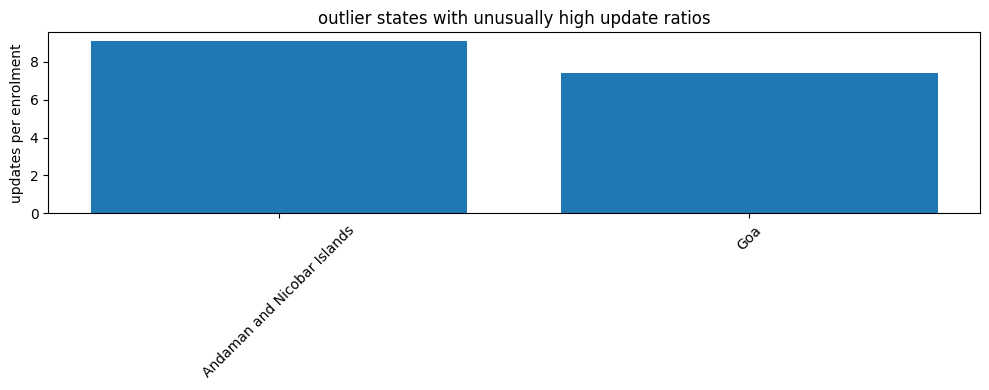

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrol=enrolment.groupby("state").size().reset_index(name="enrolments")

demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")
updates=pd.concat([demo,bio]).groupby("state").size().reset_index(name="updates")

df=enrol.merge(updates,on="state",how="inner")
df["update_to_enrolment_ratio"]=df["updates"]/df["enrolments"]

threshold=df["update_to_enrolment_ratio"].quantile(0.95)
df=df[df["update_to_enrolment_ratio"]>=threshold]
df=df.sort_values("update_to_enrolment_ratio",ascending=False)

plt.figure(figsize=(10,4))
plt.bar(df["state"],df["update_to_enrolment_ratio"])
plt.xticks(rotation=45)
plt.ylabel("updates per enrolment")
plt.title("outlier states with unusually high update ratios")
plt.tight_layout()
plt.show()
